**Defining an $\color{red}{\text{adopted user}}$ as a user who has logged into the product on three separate days in at least one sevenday
period , $\color{red}{\text{identify which factors predict future user adoption.}}$
<br>
We suggest spending 1-2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.**

Analysis of the provided data shows that the age of the account, time since account was opened is the best predictor to determine whether the user is adopted. This feature is followed by the type of the account creation type. Following graph shows how different features contributed to determine the trend of user adoption.
![Capture.JPG](attachment:Capture.JPG)
<br>
Results shows that the users who signed up early are more like to be adopted, the distribution of the account age is shown below:
![Capture_1.JPG](attachment:Capture_1.JPG)

I developed a model with a ROC_AUC of 0.65. To improve the performance of the model, We need to gather various other information of the users such as the demographic, education and financial information.

Please follow the following notebook to get insights into the coding and analysis.

## Coding Section

In [26]:
### Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date
from datetime import datetime
from datetime import timedelta


from sklearn.preprocessing import LabelEncoder

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
users=pd.read_csv('/content/drive/MyDrive/DS-SB/Take Home_1_challenge/takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [29]:
engagement=pd.read_csv('/content/drive/MyDrive/DS-SB/Take Home_1_challenge/takehome_user_engagement.csv')
engagement['time_stamp']=pd.to_datetime(engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [30]:
engagement['date']=engagement['time_stamp'].dt.date
engagement.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [31]:
#Determination of a adopted user
adopted_user=[]
for user_id in engagement['user_id'].unique():
    logins=engagement[engagement['user_id']==user_id]['date'].drop_duplicates().sort_values()
    logins=logins.diff(3).dropna()
    if len([date for date in logins if date<=timedelta(days=7)])>1:
        adopted_user.append(user_id)

In [32]:
len(adopted_user)

1265

In [33]:
#adopted_user

In [34]:
users['adopted']=['yes' if i in adopted_user else 'No' for i in users['object_id'].values]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,No
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,No
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,No
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,No
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,No


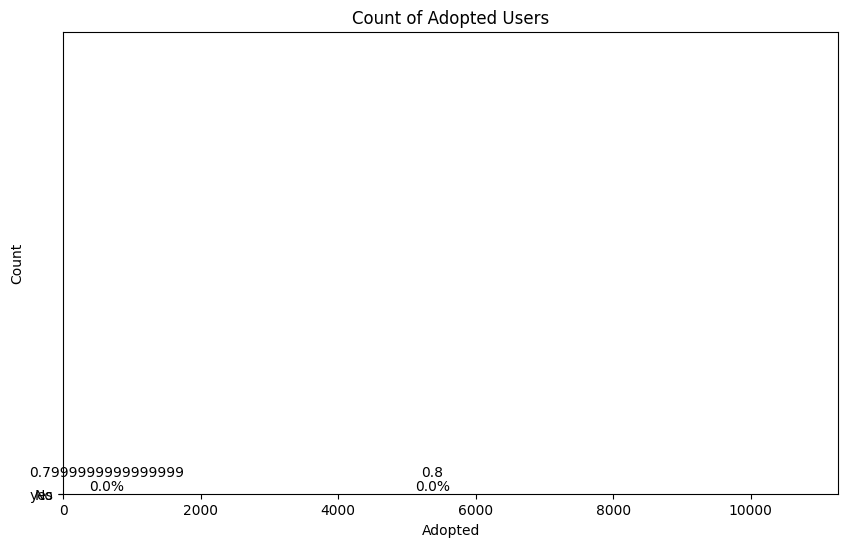

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create the count plot
ax = sns.countplot(users['adopted'])

# Set y-axis limit
plt.ylim([0, 12000])

# Annotate each bar with percentage
total = len(users)  # Total number of users
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
    ax.annotate('{}'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Adopted')
plt.ylabel('Count')
plt.title('Count of Adopted Users')

# Show plot
plt.show()


**Target is highly unbalanced, we might need to weighting factor during modelling.**

## Feature Generation

In [36]:
users['creation_time']=pd.to_datetime(users['creation_time'])

In [37]:
datetime.now()

datetime.datetime(2024, 3, 26, 6, 26, 6, 706834)

In [38]:
#Creating new feature from account creation time
account_age=datetime.now()-users['creation_time']
users['account_age']=account_age/np.timedelta64(1, 's')

<Axes: xlabel='count', ylabel='creation_source'>

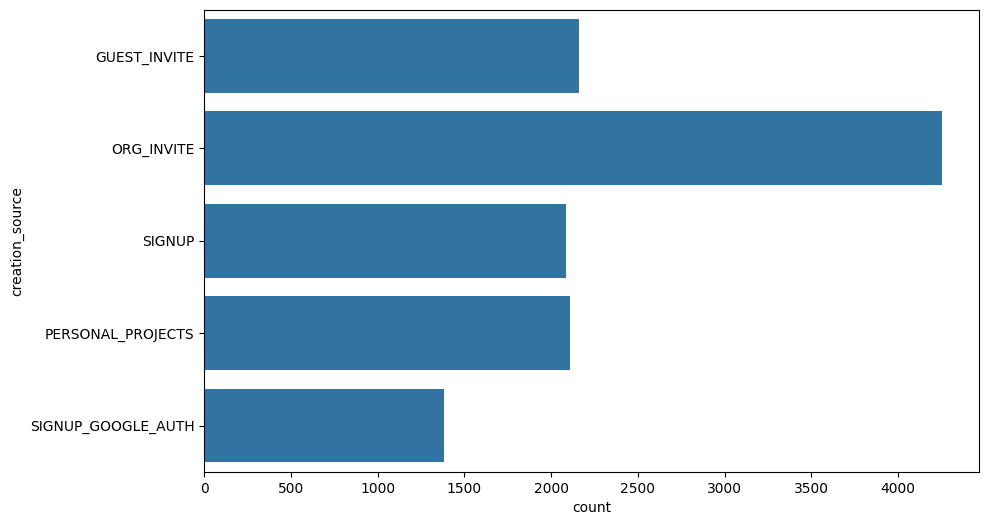

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(users['creation_source'])

## Missing Value

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  object        
 11  account_age                 12000 non-null  float64   

Two features: last session creation time and invited by user contains missing values. Missing in invite by user should corresponds to the account that are not invited. Hence, let's impute the missing value by None for invited by user and mean value in last session creation time.

In [41]:
users['last_session_creation_time']=users['last_session_creation_time'].fillna(users['last_session_creation_time'].mean())
users['invited_by_user_id']=users['invited_by_user_id'].fillna('None')

Object_id and Org_id should be object.

In [42]:
users['object_id']=users['object_id'].astype('object')
users['org_id']=users['org_id'].astype('object')

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  object        
 9   invited_by_user_id          12000 non-null  object        
 10  adopted                     12000 non-null  object        
 11  account_age                 12000 non-null  float64   

In [44]:
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

There are too many organization ids, hence, this feature will not be converted into dummy variable.

In [45]:
users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

<Axes: xlabel='creation_source', ylabel='count'>

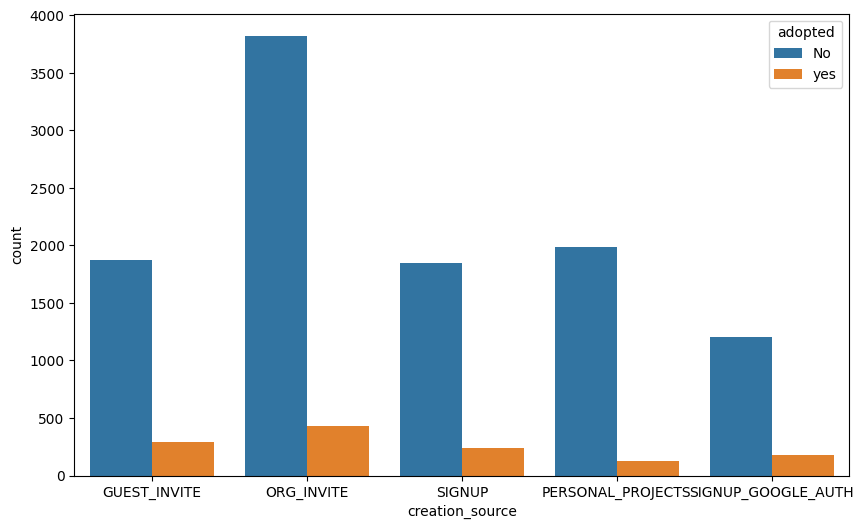

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='creation_source',data=users,hue='adopted')

**Thus feature will be converted into dummy variable later.**

In [47]:
users['invited_by_user_id'].value_counts()

None       5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
2071.0        1
1390.0        1
5445.0        1
8526.0        1
5450.0        1
Name: invited_by_user_id, Length: 2565, dtype: int64

**There are too many values for invited_by_user, we can't convert each input into dummy variables. Let's create a new feature by classifying the inputs as if the user is invited by another user or not.**

In [48]:
# Create two DataFrames based on the condition
df1 = users[users['invited_by_user_id'] != 'None'].copy()
df2 = users[users['invited_by_user_id'] == 'None'].copy()

# Set the value of 'invited_by_user_id' column accordingly
df1['invited_by_user_id'] = 'yes'
df2['invited_by_user_id'] = 'no'

# Concatenate the DataFrames
users = pd.concat([df1, df2], ignore_index=True)

# Display the counts of the 'invited_by_user_id' column
print(users['invited_by_user_id'].value_counts())


yes    6417
no     5583
Name: invited_by_user_id, dtype: int64


## Predictive model to determine if the user is adopted

## Preprocessing and Train Data Development

In [49]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'account_age'],
      dtype='object')

In [50]:
#Selecting useful features only
df=users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip', 'invited_by_user_id', 'adopted','account_age']]
df

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,account_age
0,GUEST_INVITE,1,0,yes,No,3.132956e+08
1,ORG_INVITE,0,0,yes,No,3.269473e+08
2,ORG_INVITE,0,0,yes,No,3.476995e+08
3,GUEST_INVITE,0,0,yes,No,3.423106e+08
4,GUEST_INVITE,0,0,yes,No,3.530167e+08
...,...,...,...,...,...,...
11995,PERSONAL_PROJECTS,0,0,no,No,3.469213e+08
11996,PERSONAL_PROJECTS,0,0,no,No,3.290720e+08
11997,SIGNUP_GOOGLE_AUTH,0,0,no,No,3.535918e+08
11998,PERSONAL_PROJECTS,0,0,no,No,3.729690e+08


# Encoding categorical features

#### Encoding features with boolen datatypes

In [51]:
le = LabelEncoder()
df['adopted']= le.fit_transform(df['adopted'])
df['invited_by_user_id']= le.fit_transform(df['invited_by_user_id'])
df.head()

<ipython-input-51-1cb4d01480e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adopted']= le.fit_transform(df['adopted'])
<ipython-input-51-1cb4d01480e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invited_by_user_id']= le.fit_transform(df['invited_by_user_id'])


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,account_age
0,GUEST_INVITE,1,0,1,0,3.132956e+08
1,ORG_INVITE,0,0,1,0,3.269473e+08
2,ORG_INVITE,0,0,1,0,3.476995e+08
3,GUEST_INVITE,0,0,1,0,3.423106e+08
4,GUEST_INVITE,0,0,1,0,3.530167e+08


#### Correlation within the features

<ipython-input-52-42c19d2e59ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

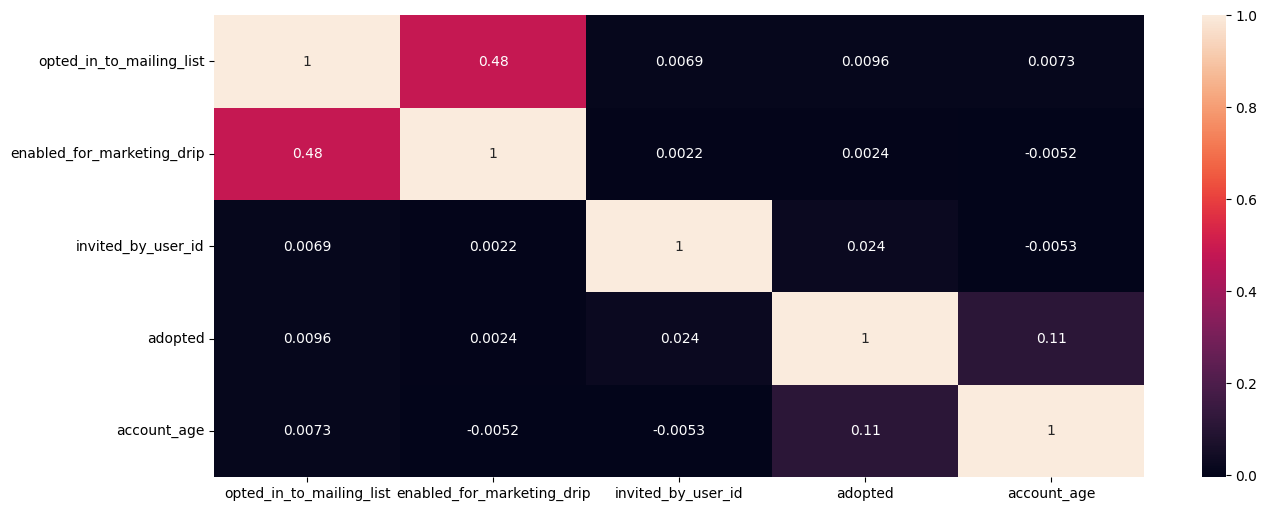

In [52]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

**Features are not highly correlated.**

In [53]:
cat=df.select_dtypes('object').columns
cat

Index(['creation_source'], dtype='object')

In [54]:
dummies=pd.get_dummies(df['creation_source'],drop_first=True)
df=pd.concat([df,dummies], axis=1)
df=df.drop('creation_source', axis=1)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,account_age,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,1,0,3.132956e+08,0,0,0,0
1,0,0,1,0,3.269473e+08,1,0,0,0
2,0,0,1,0,3.476995e+08,1,0,0,0
3,0,0,1,0,3.423106e+08,0,0,0,0
4,0,0,1,0,3.530167e+08,0,0,0,0


## Data Scaling and Train/Test split

In [55]:
### Test train split and scaling
X=df.drop(['adopted'], axis=1).values
y=df['adopted'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

Test Data Metrics:
[[2153    0]
 [ 247    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2153
           1       0.00      0.00      0.00       247

    accuracy                           0.90      2400
   macro avg       0.45      0.50      0.47      2400
weighted avg       0.80      0.90      0.85      2400



Train Data Metrics:
[[8582    0]
 [1018    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8582
           1       0.00      0.00      0.00      1018

    accuracy                           0.89      9600
   macro avg       0.45      0.50      0.47      9600
weighted avg       0.80      0.89      0.84      9600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

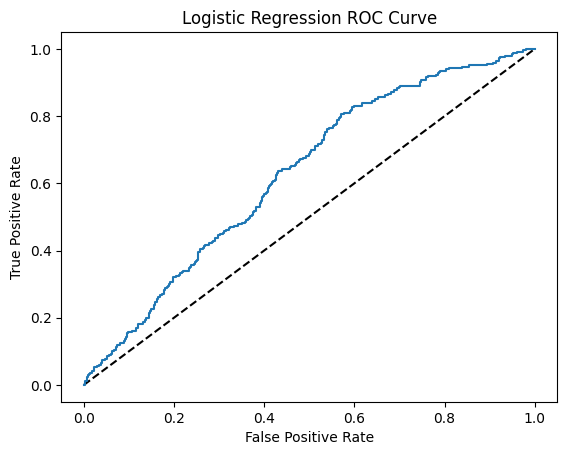

ROC_AUC Score
roc_auc (test): 0.626
roc_auc (training): 0.635


In [56]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('ROC_AUC Score')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

In [57]:
#Feature importance LR
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['adopted'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
3,account_age,100.000000
5,PERSONAL_PROJECTS,47.437034
4,ORG_INVITE,22.225939
2,invited_by_user_id,20.522806
7,SIGNUP_GOOGLE_AUTH,19.469596
0,opted_in_to_mailing_list,7.955123
6,SIGNUP,7.385012
1,enabled_for_marketing_drip,3.276962


## Weighted Logistic Regression

Test Data Metrics:
[[1048 1105]
 [  72  175]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      2153
           1       0.14      0.71      0.23       247

    accuracy                           0.51      2400
   macro avg       0.54      0.60      0.43      2400
weighted avg       0.85      0.51      0.60      2400



Train Data Metrics:
[[4214 4368]
 [ 285  733]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      8582
           1       0.14      0.72      0.24      1018

    accuracy                           0.52      9600
   macro avg       0.54      0.61      0.44      9600
weighted avg       0.85      0.52      0.60      9600



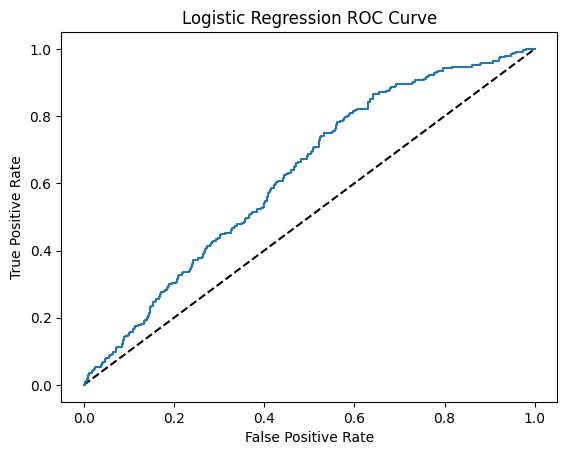

ROC_AUC Score
roc_auc (test): 0.625
roc_auc (training): 0.635


In [58]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0, class_weight={0:1,1:10})
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('ROC_AUC Score')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

####  L1 Regularized LR

In [59]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, penalty='l1', class_weight={0:1,1:10})
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train= classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[1048 1105]
 [  72  175]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      2153
           1       0.14      0.71      0.23       247

    accuracy                           0.51      2400
   macro avg       0.54      0.60      0.43      2400
weighted avg       0.85      0.51      0.60      2400



Train Data Metrics:
[[4214 4368]
 [ 286  732]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      8582
           1       0.14      0.72      0.24      1018

    accuracy                           0.52      9600
   macro avg       0.54      0.61      0.44      9600
weighted avg       0.85      0.52      0.60      9600

roc_auc (training): 0.635
roc_auc (test): 0.625


###  Random Forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0,class_weight={0:1,1:10})

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[1929  224]
 [ 214   33]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2153
           1       0.13      0.13      0.13       247

    accuracy                           0.82      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.82      0.82      0.82      2400



Train Data Metrics:
[[8582    0]
 [   3 1015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8582
           1       1.00      1.00      1.00      1018

    accuracy                           1.00      9600
   macro avg       1.00      1.00      1.00      9600
weighted avg       1.00      1.00      1.00      9600

roc_auc (training): 1.000
roc_auc (test): 0.562


###  XgBoost

In [61]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0, scale_pos_weight=10)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train = classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:26:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_stat" } are not used.

  warnings.warn(smsg, UserWarning)


Test Data Metrics:
[[1269  884]
 [ 120  127]]
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      2153
           1       0.13      0.51      0.20       247

    accuracy                           0.58      2400
   macro avg       0.52      0.55      0.46      2400
weighted avg       0.83      0.58      0.66      2400



Train Data Metrics:
[[5431 3151]
 [  53  965]]
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      8582
           1       0.23      0.95      0.38      1018

    accuracy                           0.67      9600
   macro avg       0.61      0.79      0.57      9600
weighted avg       0.91      0.67      0.73      9600

roc_auc (training): 0.877
roc_auc (test): 0.595


###  LGBM

In [62]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10,

#train the model
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1018, number of negative: 8582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106042 -> initscore=-2.131827
[LightGBM] [Info] Start training from score -2.131827
Test Data Metrics:
[[ 993 1160]
 [  59  188]]
              precision    recall  f1-score   support

           0       0.94      0.46      0.62      2153
           1       0.14      0.7

In [63]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['adopted'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
3,account_age,100.000000
4,ORG_INVITE,7.607699
0,opted_in_to_mailing_list,5.957837
5,PERSONAL_PROJECTS,5.774519
2,invited_by_user_id,5.637030
6,SIGNUP,4.995417
1,enabled_for_marketing_drip,4.124656
7,SIGNUP_GOOGLE_AUTH,3.391384


**LightGBM performs better than all other models. Hence, I will choose this as a final model.**

## Hyperparameter tuning

In [64]:
# Randomized CV
param_grid = {
    'n_estimators':list(np.arange(150,200,2)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[5,9,10,11,12,15],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid,
    n_iter=1000,
    scoring='roc_auc',
    cv=10,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more le

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
930 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
930 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    

[LightGBM] [Info] Number of positive: 1018, number of negative: 8582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106042 -> initscore=-2.131827
[LightGBM] [Info] Start training from score -2.131827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

## Final Model

In [65]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format
d_train=lgb.Dataset(X_train,y_train)

#Specifying the parameter
params={}
params['subsample_freq']= 20,
params['subsample']= 0.9,
params['scale_pos_weight']= 5,
params['reg_lambda']= 1,
params['reg_alpha']= 10,
params['num_leaves']= 50,
params['min_split_gain']= 1.5,
params['max_depth']= 25,
params['colsample_bytree']= 0.5,
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss',

#train the model
clf=lgb.train(params,d_train,194)

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[LightGBM] [Info] Number of positive: 1018, number of negative: 8582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106042 -> initscore=-2.131827
[LightGBM] [Info] Start training from score -2.131827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further 

In [66]:
#Feature Importances
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['adopted'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
3,account_age,100.000000
5,PERSONAL_PROJECTS,9.243697
4,ORG_INVITE,7.142857
7,SIGNUP_GOOGLE_AUTH,2.941176
0,opted_in_to_mailing_list,2.100840
2,invited_by_user_id,1.680672
1,enabled_for_marketing_drip,0.000000
6,SIGNUP,0.000000


In [67]:
feature_importances_LGBM['features']=feature_importances_LGBM['features'].replace(['PERSONAL_PROJECTS','ORG_INVITE','SIGNUP','SIGNUP_GOOGLE_AUTH'],['account_creation_PERSONAL_PROJECTS','account_creation_ORG_INVITE','account_creation_SIGNUP','account_creation_SIGNUP_GOOGLE_AUTH'])

### Best Predictors for Adopted users

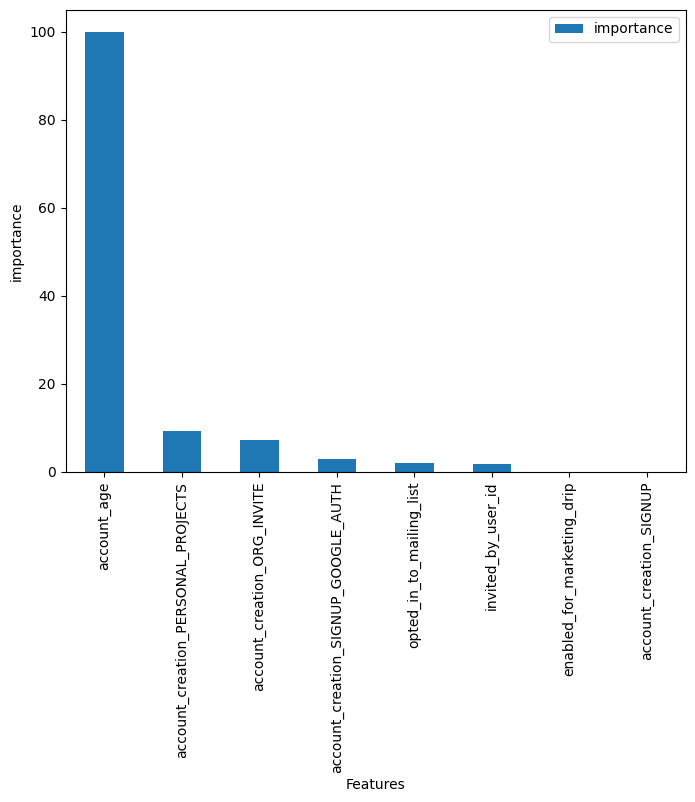

In [68]:
feature_importances_LGBM.plot(kind='bar',x='features', figsize=(8,6))
_=plt.ylabel('importance')
_=plt.xlabel('Features')

Most influential factors are: account sign up date and account creation methods.

#### Visualization of the distribution of best predictor

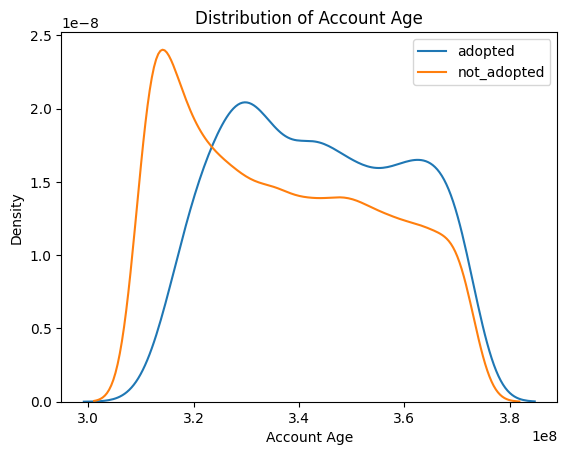

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for adopted users
sns.kdeplot(users[users['adopted'] == 'yes']['account_age'], label='adopted')

# Plot KDE for non-adopted users
sns.kdeplot(users[users['adopted'] == 'No']['account_age'], label='not_adopted')

# Add legend and title
plt.legend()
plt.title('Distribution of Account Age')
plt.xlabel('Account Age')
plt.ylabel('Density')

# Show plot
plt.show()


**Results shows that the users who signed up early are more like to be adopted, We need to gather various other information of the users to better predict if the user can be considered as an adopted user.**